In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.0.0-rc1
2.2.4-tf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4100      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5000      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 3s 87us/step - loss: 0.4616 - accuracy: 0.7800 - val_loss: 0.4866 - val_accuracy: 0.7782
Epoch 2/100
30162/30162 [==============================] - 2s 70us/step - loss: 0.3846 - accuracy: 0.8124 - val_loss: 0.4668 - val_accuracy: 0.7756
Epoch 3/100
30162/30162 [==============================] - 2s 70us/step - loss: 0.3772 - accuracy: 0.8171 - val_loss: 0.4768 - val_accuracy: 0.7626
Epoch 4/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3741 - accuracy: 0.8183 - val_loss: 0.4842 - val_accuracy: 0.7618
Epoch 5/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3666 - accuracy: 0.8235 - val_loss: 0.5267 - val_accuracy: 0.7596
Epoch 6/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3602 - accuracy: 0.8297 - val_loss: 0.4937 - val_accuracy: 0.7762
Epoch 7/100
30162/30162 [==============================] - 2s 

Epoch 56/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3265 - accuracy: 0.8456 - val_loss: 0.5700 - val_accuracy: 0.7612
Epoch 57/100
30162/30162 [==============================] - 2s 68us/step - loss: 0.3295 - accuracy: 0.8469 - val_loss: 0.5091 - val_accuracy: 0.7619
Epoch 58/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3286 - accuracy: 0.8461 - val_loss: 0.5015 - val_accuracy: 0.7603
Epoch 59/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3261 - accuracy: 0.8477 - val_loss: 0.4592 - val_accuracy: 0.7661
Epoch 60/100
30162/30162 [==============================] - 2s 67us/step - loss: 0.3243 - accuracy: 0.8485 - val_loss: 0.4184 - val_accuracy: 0.7810
Epoch 61/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3268 - accuracy: 0.8459 - val_loss: 0.5115 - val_accuracy: 0.7603
Epoch 62/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3263 - accuracy: 0.8467

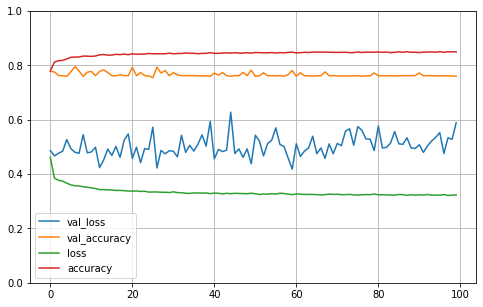

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 22us/step


[0.5887737494065942, 0.7595617771148682]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.7595617529880478

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




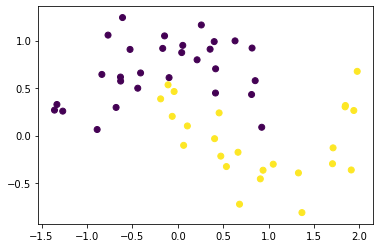

In [13]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [14]:
from keras.callbacks import History


history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(500,activation="sigmoid"))
model.add(Dense(200,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_9 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 603,901
Trainable params: 603,901
Non-trainable params: 0
_________________________________________________________________
Train on 53 samples, validate on 47 samples
Epoch 1/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5472 - val_loss: 0.7186 - val_accuracy: 0.5532
Epoch 2/1000
53/53 [==============================] - 0s 585

53/53 [==============================] - 0s 566us/step - loss: 0.0654 - accuracy: 0.9811 - val_loss: 0.2047 - val_accuracy: 0.9149
Epoch 108/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0640 - accuracy: 1.0000 - val_loss: 0.2022 - val_accuracy: 0.8936
Epoch 109/1000
53/53 [==============================] - 0s 548us/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.1997 - val_accuracy: 0.8936
Epoch 110/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.8936
Epoch 111/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.2152 - val_accuracy: 0.9149
Epoch 112/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.2141 - val_accuracy: 0.9149
Epoch 113/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0536 - accuracy: 1.0000 - val_loss: 0.2051 - val_accuracy: 

53/53 [==============================] - 0s 548us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9149
Epoch 220/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1966 - val_accuracy: 0.9149
Epoch 221/1000
53/53 [==============================] - 0s 548us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.1983 - val_accuracy: 0.9149
Epoch 222/1000
53/53 [==============================] - 0s 548us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1984 - val_accuracy: 0.9149
Epoch 223/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1985 - val_accuracy: 0.9149
Epoch 224/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1967 - val_accuracy: 0.9149
Epoch 225/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 

53/53 [==============================] - 0s 529us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2288 - val_accuracy: 0.9149
Epoch 332/1000
53/53 [==============================] - 0s 602us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.9149
Epoch 333/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9149
Epoch 334/1000
53/53 [==============================] - 0s 548us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9149
Epoch 335/1000
53/53 [==============================] - 0s 661us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9149
Epoch 336/1000
53/53 [==============================] - 0s 548us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9149
Epoch 337/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2327 - val_accuracy: 

Epoch 443/1000
53/53 [==============================] - 0s 585us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2668 - val_accuracy: 0.9149
Epoch 444/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9149
Epoch 445/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 0.9149
Epoch 446/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9149
Epoch 447/1000
53/53 [==============================] - 0s 510us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9149
Epoch 448/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2676 - val_accuracy: 0.9149
Epoch 449/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2682 -

Epoch 499/1000
53/53 [==============================] - 0s 548us/step - loss: 9.5533e-04 - accuracy: 1.0000 - val_loss: 0.2899 - val_accuracy: 0.9149
Epoch 500/1000
53/53 [==============================] - 0s 529us/step - loss: 9.4799e-04 - accuracy: 1.0000 - val_loss: 0.2903 - val_accuracy: 0.9149
Epoch 501/1000
53/53 [==============================] - 0s 548us/step - loss: 9.4707e-04 - accuracy: 1.0000 - val_loss: 0.2908 - val_accuracy: 0.9149
Epoch 502/1000
53/53 [==============================] - 0s 546us/step - loss: 9.5402e-04 - accuracy: 1.0000 - val_loss: 0.2915 - val_accuracy: 0.9149
Epoch 503/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9149
Epoch 504/1000
53/53 [==============================] - 0s 566us/step - loss: 9.9512e-04 - accuracy: 1.0000 - val_loss: 0.2911 - val_accuracy: 0.9149
Epoch 505/1000
53/53 [==============================] - 0s 529us/step - loss: 9.5823e-04 - accuracy: 1.0

Epoch 608/1000
53/53 [==============================] - 0s 510us/step - loss: 6.0724e-04 - accuracy: 1.0000 - val_loss: 0.3219 - val_accuracy: 0.8936
Epoch 609/1000
53/53 [==============================] - 0s 491us/step - loss: 5.7589e-04 - accuracy: 1.0000 - val_loss: 0.3231 - val_accuracy: 0.8936
Epoch 610/1000
53/53 [==============================] - 0s 510us/step - loss: 5.6197e-04 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.8936
Epoch 611/1000
53/53 [==============================] - 0s 510us/step - loss: 5.5657e-04 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.8936
Epoch 612/1000
53/53 [==============================] - 0s 642us/step - loss: 5.7090e-04 - accuracy: 1.0000 - val_loss: 0.3280 - val_accuracy: 0.8936
Epoch 613/1000
53/53 [==============================] - 0s 793us/step - loss: 6.0892e-04 - accuracy: 1.0000 - val_loss: 0.3286 - val_accuracy: 0.8936
Epoch 614/1000
53/53 [==============================] - 0s 585us/step - loss: 6.0360e-04 - accuracy:

53/53 [==============================] - 0s 566us/step - loss: 3.7023e-04 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.8936
Epoch 717/1000
53/53 [==============================] - 0s 661us/step - loss: 3.6810e-04 - accuracy: 1.0000 - val_loss: 0.3620 - val_accuracy: 0.8936
Epoch 718/1000
53/53 [==============================] - 0s 548us/step - loss: 3.6947e-04 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.8936
Epoch 719/1000
53/53 [==============================] - 0s 604us/step - loss: 3.7275e-04 - accuracy: 1.0000 - val_loss: 0.3624 - val_accuracy: 0.8936
Epoch 720/1000
53/53 [==============================] - 0s 529us/step - loss: 3.8195e-04 - accuracy: 1.0000 - val_loss: 0.3626 - val_accuracy: 0.8936
Epoch 721/1000
53/53 [==============================] - 0s 529us/step - loss: 3.6831e-04 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.8936
Epoch 722/1000
53/53 [==============================] - 0s 510us/step - loss: 3.6392e-04 - accuracy: 1.0000 - val_l

Epoch 825/1000
53/53 [==============================] - 0s 529us/step - loss: 2.5626e-04 - accuracy: 1.0000 - val_loss: 0.3995 - val_accuracy: 0.8936
Epoch 826/1000
53/53 [==============================] - 0s 585us/step - loss: 2.5963e-04 - accuracy: 1.0000 - val_loss: 0.3999 - val_accuracy: 0.8936
Epoch 827/1000
53/53 [==============================] - 0s 585us/step - loss: 2.5405e-04 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.8936
Epoch 828/1000
53/53 [==============================] - 0s 548us/step - loss: 2.5676e-04 - accuracy: 1.0000 - val_loss: 0.4003 - val_accuracy: 0.8936
Epoch 829/1000
53/53 [==============================] - 0s 529us/step - loss: 2.5927e-04 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.8936
Epoch 830/1000
53/53 [==============================] - 0s 548us/step - loss: 2.5278e-04 - accuracy: 1.0000 - val_loss: 0.4007 - val_accuracy: 0.8936
Epoch 831/1000
53/53 [==============================] - 0s 566us/step - loss: 2.5667e-04 - accuracy:

Epoch 934/1000
53/53 [==============================] - 0s 661us/step - loss: 1.8500e-04 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 0.8723
Epoch 935/1000
53/53 [==============================] - 0s 642us/step - loss: 1.8460e-04 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.8723
Epoch 936/1000
53/53 [==============================] - 0s 623us/step - loss: 1.8437e-04 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.8723
Epoch 937/1000
53/53 [==============================] - 0s 585us/step - loss: 1.8733e-04 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.8723
Epoch 938/1000
53/53 [==============================] - 0s 604us/step - loss: 1.8389e-04 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.8723
Epoch 939/1000
53/53 [==============================] - 0s 604us/step - loss: 1.8335e-04 - accuracy: 1.0000 - val_loss: 0.4305 - val_accuracy: 0.8723
Epoch 940/1000
53/53 [==============================] - 0s 566us/step - loss: 1.8194e-04 - accuracy:

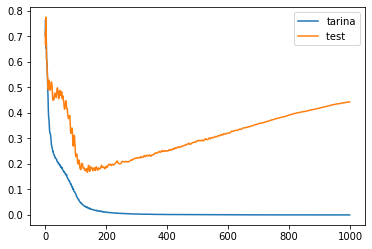

In [15]:
plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

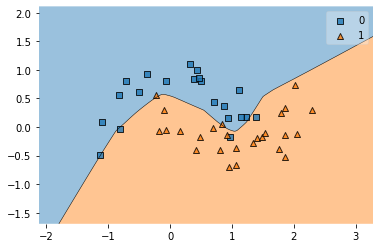

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()

In [2]:
from mlxtend.plotting import plot_decision_regions